In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random
random.seed(45)

num_coins = 100

In [ ]:
def toss(num_trials):

    '''
    num_trials: number of trials to be performed.

    return a numpy array of size num_trials with each entry representing the number of heads found in each trial

    Use for loops to generate the numpy array and 'random.choice()' to simulate a coin toss

    NOTE: Do not use predefined functions to directly get the numpy array.
    '''
    global num_coins
    results = np.zeros(num_trials, dtype=int)
    for i in range(num_trials):
        heads = 0
        for j in range(num_coins):
            if random.choice([0, 1]) == 1:
                heads += 1
        results[i] = heads

    return results

toss(num_trials=10)

array([50, 52, 54, 56, 47, 38, 46, 45, 52, 46])

In [ ]:
random.seed(45)
def toss(num_trials):

    '''
    num_trials: number of trials to be performed.

    return a numpy array of size num_trials with each entry representing the number of heads found in each trial

    Use for loops to generate the numpy array and 'random.choice()' to simulate a coin toss

    NOTE: Do not use predefined functions to directly get the numpy array.
    '''
    global num_coins
    results = np.zeros(num_trials, dtype=int)
    for i in range(num_trials):
        results[i] = sum([random.choice([0, 1]) for _ in range(num_coins)])

    return results

toss(num_trials=10)

array([50, 52, 54, 56, 47, 38, 46, 45, 52, 46])

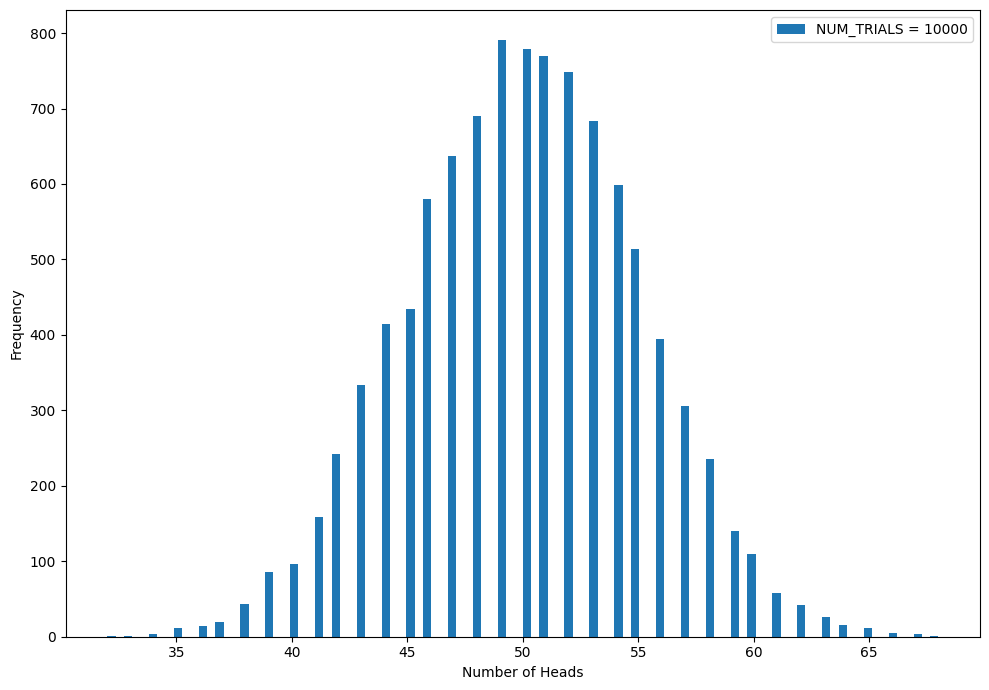

In [ ]:
random.seed(45)

def plot_hist(trial):
    '''
    trial: vector of values for a particular trial.

    plot the histogram for each trial.
    Use 'axs' from plt.subplots() function to create histograms. You can search about how to use it to plot histograms.

    Save the images in a folder named "histograms" in the current working directory.
    '''
    fig, axs = plt.subplots(figsize =(10, 7), tight_layout=True)

    ## Write your code here
    lenn = len(trial)
    axs.set_xlabel('Number of Heads')
    axs.set_ylabel('Frequency')
    axs.hist(trial, bins=100, label=f"NUM_TRIALS = {lenn}")
    axs.legend()
    fig.savefig( f"histograms/hist_{lenn}.png")
    plt.show()



plot_hist(trial=toss(num_trials=10000))


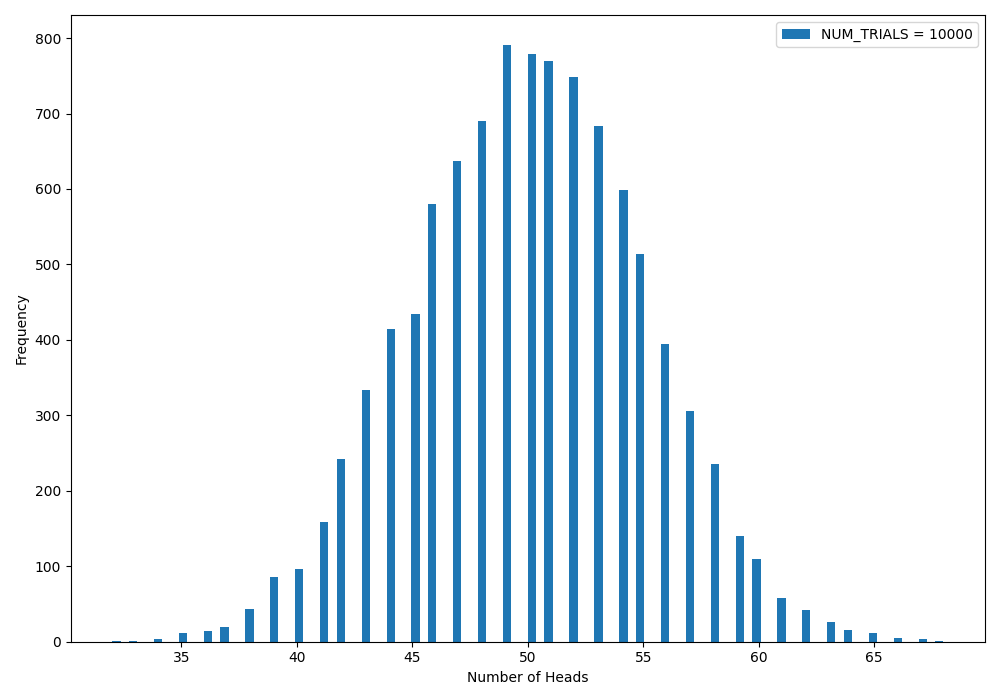

In [ ]:
from IPython.display import Image
Image('histograms/hist_10000.png')

In [ ]:
!mkdir histograms

In [17]:
"""Tensor Manipulations and Softmax. Consider N column vectors
{u1, . . . , uN}, ui ∈ Rd
≥0, and two non-negative real-valued d × d matricesM1,M2.
Complete each of the following steps using numpy operations and do not use any
for loops:
1. Compute xi = uT
i M1, ∀i ∈ {1, . . . , N}. Stack the N row vectors xi to form a new
matrix X ∈ RN×d. Similarly, construct a matrix Y ∈ RN×d using row vectors
computed from uT
i M2, ∀i ∈ {1, . . . , N}. [1 pts]
2. Modify X to add the integer i to all elements of its ith row, where i ∈ {1, . . . , N}.
Let this offset-modified matrix now be ˆX."""

import numpy as np

def initialise_input(N, d):
  '''
  N: Number of vectors
  d: dimension of vectors
  '''
  np.random.seed(0)
  U = np.random.randn(N, d)
  M1 = np.abs(np.random.randn(d, d))
  M2 = np.abs(np.random.randn(d, d))

  return U, M1, M2

def solve(N,d):

  '''
  Enter your code here for steps 1 to 6
  '''

  U, M1, M2 = initialise_input(N, d)
  X = np.zeros((N, d))
  Y = np.zeros((N, d))
  print(U)
  print(M1)
  print(M2)
  print(U[1].shape)
  print(U[1, :].reshape(1,-1))
  print("product")
  print((np.dot(U[1, :].reshape(1,-1),M1)).shape)


  for i in range(N):
    X[i] = np.dot(U[i, :].reshape(1,-1),M1)
    Y[i] = np.dot(U[i, :].reshape(1,-1),M2)

  print("after dot product X: \n",X)
  print("after dot product Y: \n",Y)
  offset = np.arange(1, N+1).reshape(-1, 1)
  print("offset: \n",offset)
  X_offset = X + offset
  Y_offset = Y + offset
  print("after adding offset x: \n",X_offset)
  print("after adding offset y: \n",Y_offset)
  Z =np.dot(X_offset,Y_offset.T)
  print(Z.shape)

  # Sparisfying the matrix Z
  sparse_z = np.zeros(Z.shape)
  rows, cols = np.indices(Z.shape)

  sparse_z[rows==cols] = Z[rows==cols]

  sparse_z[(rows%2==cols%2)&(rows!=cols)] = Z[(rows%2==cols%2)&(rows!=cols)]
#   print(sparse_z)
#   return sparse_z

  # Applying softmax function to each row of  matrix z

  softmax_z = np.zeros(sparse_z.shape)
  for i in range(N):
    softmax_z[i] = np.exp(sparse_z[i]) / np.sum(np.exp(sparse_z[i]))

  print(softmax_z)
  print([max(softmax_z[i]) for i in range(N)])
  print(np.argmax(softmax_z, axis=1))
  return softmax_z


solve(3,2)


[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]
[[0.95008842 0.15135721]
 [0.10321885 0.4105985 ]]
[[0.14404357 1.45427351]
 [0.76103773 0.12167502]]
(2,)
[[0.97873798 2.2408932 ]]
product
(1, 2)
after dot product X: 
 [[ 1.71730947  0.43130599]
 [ 1.16119005  1.06824644]
 [ 1.67347171 -0.11860047]]
after dot product Y: 
 [[ 0.55863513  2.61410373]
 [ 1.84638518  1.69601344]
 [-0.47473561  2.59702981]]
offset: 
 [[1]
 [2]
 [3]]
after adding offset x: 
 [[2.71730947 1.43130599]
 [3.16119005 3.06824644]
 [4.67347171 2.88139953]]
after adding offset y: 
 [[1.55863513 3.61410373]
 [3.84638518 3.69601344]
 [2.52526439 5.59702981]]
(3, 3)
[[4.21532164e-03 3.45866944e-07 9.95784332e-01]
 [6.22766473e-11 1.00000000e+00 6.22766473e-11]
 [3.60302104e-05 7.42267450e-13 9.99963970e-01]]
[0.9957843324960176, 0.9999999998754467, 0.9999639697888275]
[2 1 2]


array([[4.21532164e-03, 3.45866944e-07, 9.95784332e-01],
       [6.22766473e-11, 1.00000000e+00, 6.22766473e-11],
       [3.60302104e-05, 7.42267450e-13, 9.99963970e-01]])

In [20]:
"""Tensor Manipulations and Softmax. Consider N column vectors
{u1, . . . , uN}, ui ∈ Rd
≥0, and two non-negative real-valued d × d matricesM1,M2.
Complete each of the following steps using numpy operations and do not use any
for loops:
1. Compute xi = uT
i M1, ∀i ∈ {1, . . . , N}. Stack the N row vectors xi to form a new
matrix X ∈ RN×d. Similarly, construct a matrix Y ∈ RN×d using row vectors
computed from uT
i M2, ∀i ∈ {1, . . . , N}. [1 pts]
2. Modify X to add the integer i to all elements of its ith row, where i ∈ {1, . . . , N}.
Let this offset-modified matrix now be ˆX."""

import numpy as np

def initialise_input(N, d):
    '''
    N: Number of vectors
    d: dimension of vectors
    '''
    np.random.seed(0)
    U = np.random.randn(N, d)
    M1 = np.abs(np.random.randn(d, d))
    M2 = np.abs(np.random.randn(d, d))

    return U, M1, M2

def solve(N,d):

    '''
    Enter your code here for steps 1 to 6
    '''

    U, M1, M2 = initialise_input(N, d)
    X = np.zeros((N, d))
    Y = np.zeros((N, d))
    #   print(U)
    #   print(M1)
    #   print(M2)
    #   print(U[1].shape)
    #   print(U[1, :].reshape(1,-1))
    #   print("product")
    #   print((np.dot(U[1, :].reshape(1,-1),M1)).shape)


    for i in range(N):
        X[i] = np.dot(U[i, :].reshape(1,-1),M1)
        Y[i] = np.dot(U[i, :].reshape(1,-1),M2)

    # print("after dot product X: \n",X)
    # print("after dot product Y: \n",Y)
    offset = np.arange(1, N+1).reshape(-1, 1)
    # print("offset: \n",offset)
    X_offset = X + offset
    Y_offset = Y + offset
    # print("after adding offset x: \n",X_offset)
    # print("after adding offset y: \n",Y_offset)
    Z =np.dot(X_offset,Y_offset.T)
    # print(Z.shape)

    # Sparisfying the matrix Z
    sparse_z = np.zeros(Z.shape)
    rows, cols = np.indices(Z.shape)

    sparse_z[rows==cols] = Z[rows==cols]

    sparse_z[(rows%2==cols%2)&(rows!=cols)] = Z[(rows%2==cols%2)&(rows!=cols)]
    #   print(sparse_z)
    #   return sparse_z

    # Applying softmax function to each row of  matrix z

    softmax_z = np.zeros(sparse_z.shape)
    for i in range(N):
        softmax_z[i] = np.exp(sparse_z[i]) / np.sum(np.exp(sparse_z[i]))

    # print(softmax_z)
    # print([max(softmax_z[i]) for i in range(N)])
    matrix_indices = np.argmax(softmax_z, axis=1)
    return matrix_indices


solve(3,2)


array([2, 1, 2])